In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving nbaplayersdraft.csv to nbaplayersdraft.csv


In [ ]:
df = pd.read_csv('nbaplayersdraft.csv')
df.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [ ]:
# Data Cleaning
print(df.isnull().sum())
df = df.dropna(subset=['years_active'])

id                             0
year                           0
rank                           0
overall_pick                   0
team                           0
player                         0
college                      337
years_active                 253
games                        253
minutes_played               253
points                       253
total_rebounds               253
assists                      253
field_goal_percentage        257
3_point_percentage           377
free_throw_percentage        289
average_minutes_played       253
points_per_game              253
average_total_rebounds       253
average_assists              253
win_shares                   253
win_shares_per_48_minutes    254
box_plus_minus               254
value_over_replacement       253
dtype: int64


Regression Coefficient (Slope): -0.12395238104327806
Regression Intercept: 9.666846075086287


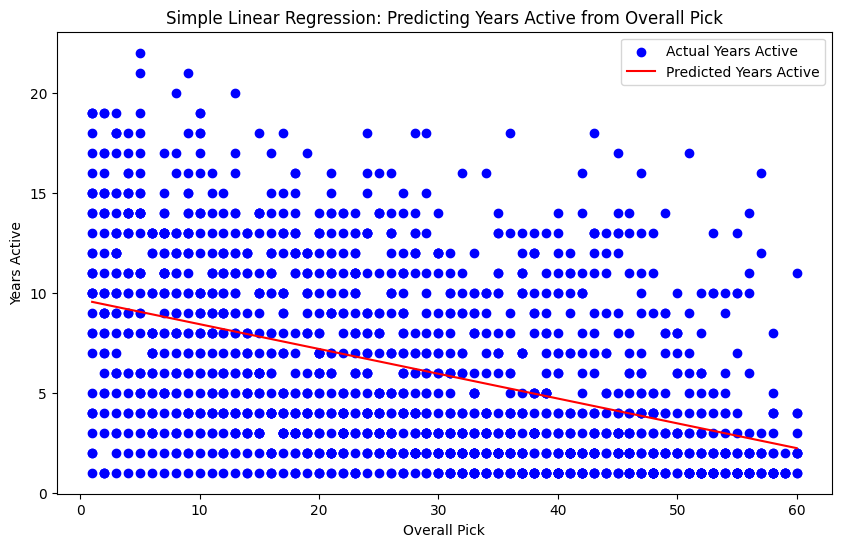

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['overall_pick']]  # Independent variable
y = df['years_active']  # Dependent variable

# Creating and training the model
model = LinearRegression()
model.fit(X, y)

# Making predictions
df['predicted_years_active'] = model.predict(X)

# Displaying the regression coefficient and intercept
print(f"Regression Coefficient (Slope): {model.coef_[0]}")
print(f"Regression Intercept: {model.intercept_}")

# Plotting the regression line
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['overall_pick'], df['years_active'], color='blue', label='Actual Years Active')
plt.plot(df['overall_pick'], df['predicted_years_active'], color='red', label='Predicted Years Active')
plt.xlabel('Overall Pick')
plt.ylabel('Years Active')
plt.title('Simple Linear Regression: Predicting Years Active from Overall Pick')
plt.legend()
plt.show()


In [ ]:
# Create new df containing college players who have played
df_college_players = df.dropna(subset=['college', 'years_active']).copy()
# Count number of players drafted from each
player_count = df_college_players['college'].value_counts()

# Remove colleges with less than 5 drafted players
valid_colleges = player_count[player_count >= 5].index
df_college_players = df_college_players[df_college_players['college'].isin(valid_colleges)]
avg_career_by_college = df_college_players.groupby('college')['years_active'].mean()

# Display the top colleges with highest mean career lengths
print(avg_career_by_college.sort_values(ascending=False).head(10))

college
Wake Forest      10.181818
Georgetown        9.133333
UConn             8.481481
UNC               8.425000
Texas-El Paso     8.400000
Temple            8.250000
Georgia Tech      8.086957
Cincinnati        8.083333
Oregon State      8.000000
Utah              7.888889
Name: years_active, dtype: float64


In [ ]:
# Categorize picks
def pick_range(pick):
    if pd.isna(pick):
        return 'Unknown'
    if pick <= 5:
        return 'Top 5'
    elif pick <= 14:
        return 'Lottery'
    elif pick <= 30:
        return 'First Round'
    else:
        return 'Second Round'
# Categorize and create new column
df['pick_category'] = df['overall_pick'].apply(pick_range)
# Calculate average career length
stats_by_category = df.groupby('pick_category')['years_active'].mean()

print('Career Length by Draft Position', stats_by_category)


Career Length by Draft Position pick_category
First Round      6.607767
Lottery          8.287162
Second Round     4.314574
Top 5           10.442424
Name: years_active, dtype: float64


<ipython-input-40-d4d392d644ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


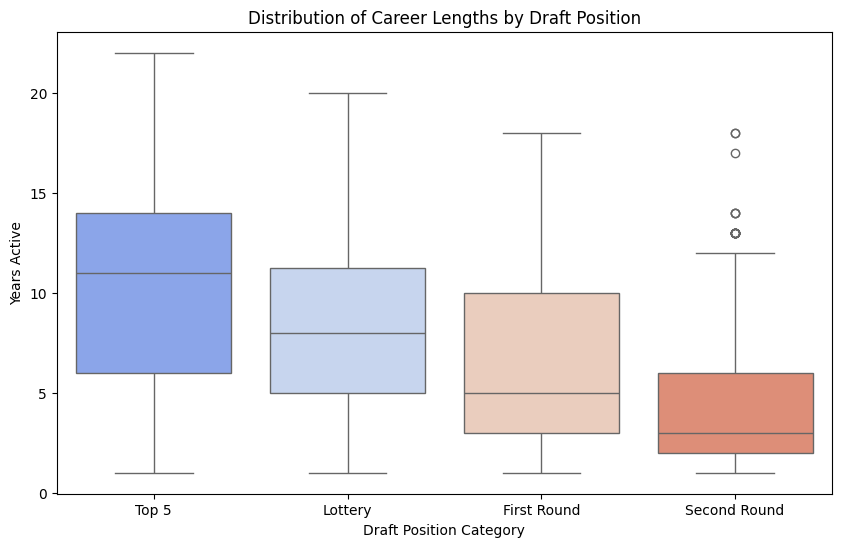

In [ ]:
# Create bar graph
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='pick_category',
    y='years_active',
    data=df_college_players,
    order=['Top 5', 'Lottery', 'First Round', 'Second Round'],
    palette='coolwarm'
)
plt.title('Distribution of Career Lengths by Draft Position')
plt.xlabel('Draft Position Category')
plt.ylabel('Years Active')
plt.show()